In [1]:
import MagmaPandas.geochemistry.volatile_solubility.IaconoMarziano as im
im_config = im.IaconoMarziano_configuration()
im_config.parameters = "hydrous_webapp"
im_config.print()

Parameterisation.....hydrous_webapp
Fugacity model................ideal
Activity model................ideal
Species model.................mixed


In [9]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.parse.readers as r
import pandas as pd
import elements as e
import numpy as np
import matplotlib.pyplot as plt
import VESIcal as v
config = mp.configuration()

In [10]:
melt = mp.read_melt_inclusion('./melt.csv', index_col=['name'], total_col='total')

In [11]:
sample = "PI052-02-01"
FeO_initial = 15
Fo_host = 0.6
Kd = 0.29
P_bar = 1e3
T_K = 1400
inclusion = melt.iloc[4,:].copy()
# inclusion["H2O"] = 5


In [12]:
inclusion

SiO2      47.851799
Al2O3     15.871700
MgO        7.863920
CaO       10.468700
FeO        8.851050
Na2O       3.148020
K2O        1.180670
MnO        0.098343
TiO2       3.431850
P2O5       0.598803
Cr2O3           NaN
CO2        0.357400
H2O        1.046258
F          0.072200
S          0.176900
Cl         0.056800
total    101.074409
dtype: float32

In [13]:
for idx in range(20):

    inclusion = melt.iloc[idx,:].copy()
    s = v.Sample(inclusion[inclusion.index.intersection(v.oxides)])
    model = "IaconoMarziano"
    VC = v.calculate_saturation_pressure(s, temperature=T_K, model=model).result
    me = im.calculate_saturation(inclusion, T_K)
    print(f"VESIcal: {VC:<30} me: {me:>25}, delta: {(VC - me): .0f} bar")

VESIcal: 1135.0819765843985             me:        1107.7538475310262, delta:  27 bar
VESIcal: 980.96719669942                me:         959.9681779056285, delta:  21 bar
VESIcal: 2697.3194124783713             me:         2569.628458577632, delta:  128 bar
VESIcal: 3550.6968582974273             me:        3539.8323289761165, delta:  11 bar
VESIcal: 4161.325575507349              me:        3936.2571357407737, delta:  225 bar
VESIcal: 1705.9411018117605             me:          1651.72690694096, delta:  54 bar
VESIcal: 2065.48552875569               me:         2040.893410386005, delta:  25 bar
VESIcal: 2155.1196858509857             me:         2075.348292347747, delta:  80 bar
VESIcal: 3189.99923822234               me:        3036.5518163797988, delta:  153 bar
VESIcal: 2033.9987248521843             me:         1964.607163839736, delta:  69 bar
VESIcal: 2865.2959249451123             me:         2748.479233678945, delta:  117 bar
VESIcal: 2541.5411238324023             me:       

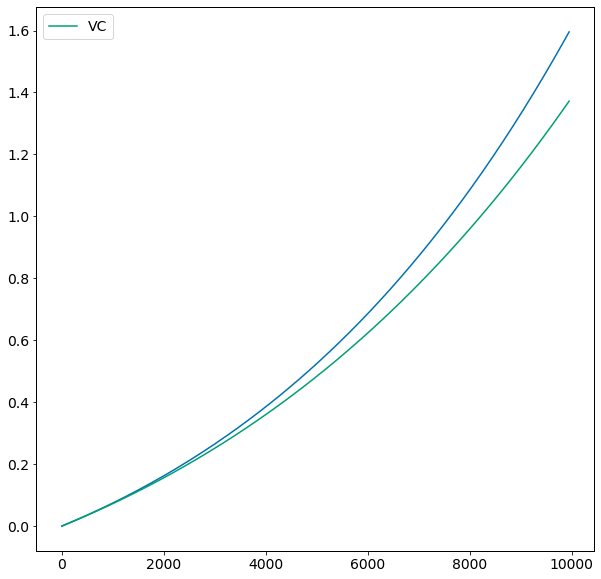

In [8]:
inclusion = melt.iloc[0,:].copy()
s = v.Sample(inclusion[inclusion.index.intersection(v.oxides)])
model = "IaconoMarzianoCarbon"

p = np.arange(1,  1e4, 5e1)
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(p, [im.co2.calculate_solubility(inclusion, x_fluid=0, P_bar=i, T_K=1400) for i in p])
plt.plot(p, [v.calculate_dissolved_volatiles(s, temperature=T_K, pressure=i, model=model).result for i in p], label="VC")

plt.legend()
plt.show()